<a href="https://colab.research.google.com/github/tkdforever18/Carlos/blob/main/Equipo_4_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read excel file
filename = "/content/drive/MyDrive/sisisis/Challenge_4y5.xlsx"
sheet = "Challenge_4y5"

df = pd.read_excel(filename,sheet)

In [7]:
df

,Cliente,Producto,sem44,sem43,sem42,sem41
0,500000055,BEBIDAS REFRESCANTES,0.422700,0.422700,0.000000,0.422700
1,500000055,COLAS REGULAR INDIVIDUAL NO RETORNABLE,8.601600,6.065500,12.680500,8.601600
2,500000055,COLAS REGULAR FAMILIAR RETORNABLE,26.770000,22.895300,46.847499,30.292399
3,500000055,LECHE UHT SABORIZADA,0.140900,0.105700,0.000000,0.140900
4,500000055,COLAS LIGHT INDIVIDUAL,0.000000,1.268000,2.536000,1.268000
...,...,...,...,...,...,...
999995,500257111,COLAS REGULAR FAMILIAR NO RETORNABLE,43.677199,21.838600,70.094898,28.531100
999996,500257111,COLAS REGULAR FAMILIAR RETORNABLE,89.820498,47.199799,128.214397,63.050498
999997,500257111,AGUA PURIFICADA FAMILIAR,3.522400,0.000000,3.522400,0.000000
999998,500257111,LECHE UHT SABORIZADA,0.000000,0.000000,0.140900,0.000000


In [13]:
#Numero de clientes
n = np.unique(df["Producto"])
print(len(n))

27


In [14]:
pivot = pd.pivot_table(df, 
               index= ['Producto'],
               values = ['sem41','sem42','sem43','sem44'],
               aggfunc = 'mean')
pivot

,sem41,sem42,sem43,sem44
Producto,,,,
AGUA MINERAL FAMILIAR,0.753989,0.964598,0.657654,0.755423
AGUA MINERAL INDIVIDUAL,0.861323,1.065884,0.756734,0.811075
AGUA PURIFICADA FAMILIAR,3.213349,4.326480,2.799278,3.133981
AGUA PURIFICADA INDIVIDUAL,2.919401,3.589888,2.807761,3.084070
AGUA SABORIZADA INDIVIDUAL,0.505626,0.585546,0.442855,0.433595
BEBIDAS DE SOYA FAMILIAR,0.381235,0.447952,0.358567,0.384149
BEBIDAS DE SOYA INDIVIDUAL,0.052618,0.108108,0.102069,0.085352
BEBIDAS ENERGETICAS,0.121468,0.118428,0.089270,0.101418
BEBIDAS INFANTILES,0.459892,0.535985,0.406007,0.455863


In [62]:
x = pivot.iloc[:,0:4].values
y = pivot.iloc[:,0].index

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
x_std = StandardScaler().fit_transform(x)

In [54]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(x_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.5000359  -0.22907065 -0.83148751 -0.07822567]
 [ 0.49993679  0.86154558  0.0685401  -0.05571953]
 [ 0.50001183 -0.36785547  0.46165289 -0.63367747]
 [ 0.50001547 -0.26447721  0.30134265  0.7676125 ]]

Eigenvalues 
[4.15269300e+00 7.39970467e-04 1.42759143e-04 2.70422741e-04]


In [55]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda z: z[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
4.1526930014954875
0.0007399704669652456
0.0002704227410219107
0.00014275914267985142


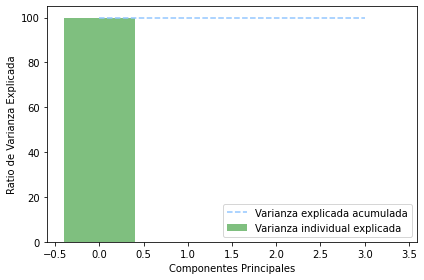

In [56]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(4), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [57]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matriz W:\n', matrix_w)

Y = x_std.dot(matrix_w)

Matriz W:
 [[ 0.5000359  -0.22907065]
 [ 0.49993679  0.86154558]
 [ 0.50001183 -0.36785547]
 [ 0.50001547 -0.26447721]]


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

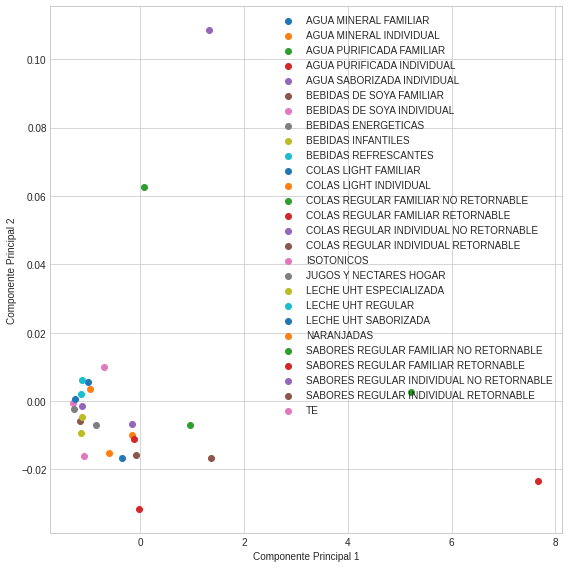

In [80]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 8))
    for lab in zip(y):
        plt.scatter(Y[y==lab[0], 0],
                    Y[y==lab[0], 1],
                    label=lab[0])
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.tight_layout()

    plt.show() 